In [1]:
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
def get_df_from_url(url):
    # Send a GET request to the API URL
    req = requests.get(url)
    
    # Ensure the request was successful (status code 200)
    if req.status_code == 200:
        wb = req.json()  # Parse the JSON response
        
        # Check if the response is directly a list of records
        if isinstance(wb, list):
            # Directly normalize the list of records into a DataFrame
            df = pd.json_normalize(wb)
        else:
            # If the response contains a 'results' key, normalize that
            df = pd.json_normalize(wb.get("results", []))
        
        return df
    else:
        # Handle failed request (non-200 status code)
        print(f"Failed to retrieve data: {req.status_code}")
        return None

In [3]:
api_url_1='https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/belib-points-de-recharge-pour-vehicules-electriques-donnees-statiques/exports/json'
api_url_2='https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/belib-points-de-recharge-pour-vehicules-electriques-disponibilite-temps-reel/exports/json'
api_url_3='https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/comptages-routiers-permanents/exports/json'

belib_statique=get_df_from_url(api_url_1)
belib_temps_reel=get_df_from_url(api_url_2)

In [20]:
belib_statique.shape

(1947, 43)

Disponibilité en temps réél des bornes de recharges

In [7]:
api_url_2 = 'https://opendata.paris.fr/api/explore/v2.1/catalog/datasets/belib-points-de-recharge-pour-vehicules-electriques-disponibilite-temps-reel/exports/json'

real_time_data = get_df_from_url(api_url_2)

real_time_data.columns

real_time_data.head()

,id_pdc,statut_pdc,url_description_pdc,last_updated,adresse_station,code_insee_commune,arrondissement,coordonneesxy.lon,coordonneesxy.lat,coordonneesxy
0,FR*V75*EPX08*18*6,Inconnu,https://parisdata.opendatasoft.com/explore/dat...,2023-10-24T05:58:37+00:00,7 boulevard Malesherbes 75008 Paris,75108,08e Arrondissement,2.322649,48.870600,NaN
1,FR*V75*PHBSAI*AUG*01*2,Mise en service planifiée,https://parisdata.opendatasoft.com/explore/dat...,2023-12-11T03:30:05+00:00,18 rue Laborde 75008 PARIS,None,08e Arrondissement,2.320347,48.875770,NaN
2,FR*V75*EPX08*03*6,Inconnu,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T02:30:01+00:00,66 Rue d'Astorg 75008 Paris,75108,08e Arrondissement,2.319389,48.872833,NaN
3,FR*V75*EPX08*03*1,Inconnu,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T02:30:01+00:00,66 Rue d'Astorg 75008 Paris,75108,08e Arrondissement,2.319389,48.872833,NaN
4,FR*V75*EPX08*03*3,Inconnu,https://parisdata.opendatasoft.com/explore/dat...,2022-06-13T02:30:01+00:00,66 Rue d'Astorg 75008 Paris,75108,08e Arrondissement,2.319389,48.872833,NaN


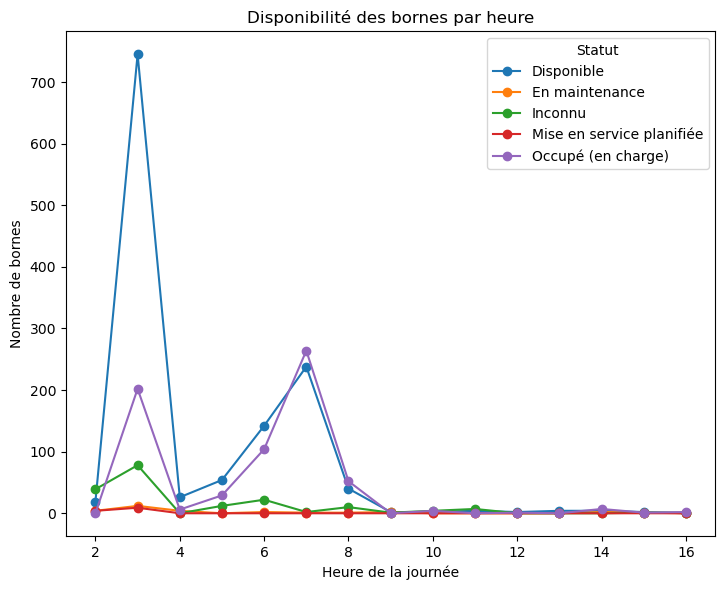

In [9]:
#Convertir last_updated en format datetime
real_time_data['last_updated'] = pd.to_datetime(real_time_data['last_updated'])

# Extraire les informations temporelles
real_time_data['hour'] = real_time_data['last_updated'].dt.hour
real_time_data['weekday'] = real_time_data['last_updated'].dt.day_name()

# Calculer la disponibilité moyenne par heure et par jour
hourly_status = real_time_data.groupby(['hour', 'statut_pdc']).size().unstack(fill_value=0)
weekday_status = real_time_data.groupby(['weekday', 'statut_pdc']).size().unstack(fill_value=0)

# Ordre des jours de la semaine
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_status = weekday_status.reindex(weekday_order)

# Graphiques de disponibilité moyenne
plt.figure(figsize=(14, 6))

# Graphique 1 : Tendances par heure
plt.subplot(1, 2, 1)
hourly_status.plot(kind='line', marker='o', ax=plt.gca())
plt.title("Disponibilité des bornes par heure")
plt.xlabel("Heure de la journée")
plt.ylabel("Nombre de bornes")
plt.legend(title="Statut")

plt.tight_layout()
plt.show()

In [16]:
real_time_data.sort_values('hour', ascending=False)

,id_pdc,statut_pdc,url_description_pdc,last_updated,adresse_station,code_insee_commune,arrondissement,coordonneesxy.lon,coordonneesxy.lat,coordonneesxy,hour,weekday
227,FR*V75*EPX07*03*6,Inconnu,https://parisdata.opendatasoft.com/explore/dat...,2024-04-11 16:03:51+00:00,None,None,None,NaN,NaN,NaN,16,Thursday
138,FR*V75*E9020*02*3,Occupé (en charge),https://parisdata.opendatasoft.com/explore/dat...,2024-03-16 16:17:41+00:00,227 Avenue Gambetta 75020 Paris,75120,20e Arrondissement,2.405196,48.874134,NaN,16,Saturday
69,FR*V75*EPX16*09*1,Occupé (en charge),https://parisdata.opendatasoft.com/explore/dat...,2023-10-30 16:13:04+00:00,72 Avenue Paul Doumer 75016 Paris,75116,16e Arrondissement,2.278694,48.859756,NaN,16,Monday
29,FR*V75*EPX02*09*4,Disponible,https://parisdata.opendatasoft.com/explore/dat...,2023-02-21 15:32:08+00:00,116 Rue Réaumur 75002 Paris,75102,Paris centre,2.345250,48.867810,NaN,15,Tuesday
63,FR*V75*EPX16*09*5,En maintenance,https://parisdata.opendatasoft.com/explore/dat...,2023-10-30 15:02:31+00:00,72 Avenue Paul Doumer 75016 Paris,75116,16e Arrondissement,2.278694,48.859756,NaN,15,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...
54,FR*V75*EPX18*09*3,Inconnu,https://parisdata.opendatasoft.com/explore/dat...,2023-10-16 02:30:06+00:00,162 Rue Championnet 75018 Paris,75118,18e Arrondissement,2.335500,48.894900,NaN,2,Monday
55,FR*V75*EPX06*04*3,Inconnu,https://parisdata.opendatasoft.com/explore/dat...,2023-10-20 02:30:07+00:00,3 Rue de Bérite 75006 Paris,75106,06e Arrondissement,2.323978,48.847874,NaN,2,Friday
56,FR*V75*EPX06*04*4,Inconnu,https://parisdata.opendatasoft.com/explore/dat...,2023-10-20 02:30:07+00:00,3 Rue de Bérite 75006 Paris,75106,06e Arrondissement,2.323978,48.847874,NaN,2,Friday
58,FR*V75*EPX18*09*6,Inconnu,https://parisdata.opendatasoft.com/explore/dat...,2023-10-16 02:30:06+00:00,162 Rue Championnet 75018 Paris,75118,18e Arrondissement,2.335500,48.894900,NaN,2,Monday


In [2]:
df= pd.read_csv('ytrain_NpxebDC.csv')
static_data = pd.read_csv('xtrain.csv')
static_data.head()
df.head()

/tmp/ipykernel_75830/2204346736.py:1: DtypeWarning: Columns (1,3,5,11,20,49,52,54,55,56,64,70,71,94,95,101,102,114,129,131,132,133,138,139,152,157,163,174,180,184,193,196,201,207,208,219,220,228,241,245,250,256,258,264,265,269,270,271,272,273) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('ytrain_NpxebDC.csv')


,timestamp,S7-T1,S2-T1,S19-T1,S56-T3,S85-T3,S16-T3,S16-T1,S94-T3,S28-T1,...,S47-T2,S65-T2,S32-T2,S21-T2,S13-T2,S97-T2,S25-T1,S25-T2,S98-T2,S99-T2
0,2019-11-25T00:00:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,...,Down,Offline,Offline,Available,Available,NaN,NaN,NaN,NaN,NaN
1,2019-11-25T00:15:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,...,Down,Offline,Offline,Available,Available,NaN,NaN,NaN,NaN,NaN
2,2019-11-25T00:30:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,...,Down,Offline,Offline,Available,Available,NaN,NaN,NaN,NaN,NaN
3,2019-11-25T00:45:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,...,Down,Offline,Offline,Available,Available,NaN,NaN,NaN,NaN,NaN
4,2019-11-25T01:00:00+00:00,Down,Down,Available,Down,Down,Offline,Offline,Offline,Available,...,Down,Offline,Offline,Available,Available,NaN,NaN,NaN,NaN,NaN


Reshaping my dataset

In [10]:
# Reshaping the data

real_time_data = df.melt(id_vars=["timestamp"],var_name="station",value_name="state")
real_time_data

,timestamp,station,state
0,2019-11-25T00:00:00+00:00,S7-T1,Down
1,2019-11-25T00:15:00+00:00,S7-T1,Down
2,2019-11-25T00:30:00+00:00,S7-T1,Down
3,2019-11-25T00:45:00+00:00,S7-T1,Down
4,2019-11-25T01:00:00+00:00,S7-T1,Down
...,...,...,...
8526331,2020-11-08T22:45:00+00:00,S99-T2,Available
8526332,2020-11-08T23:00:00+00:00,S99-T2,Available
8526333,2020-11-08T23:15:00+00:00,S99-T2,Available
8526334,2020-11-08T23:30:00+00:00,S99-T2,Available


In [13]:
real_time_data.columns

Index(['timestamp', 'station', 'state', 'hour', 'date'], dtype='object')

In [17]:
# Check if there are missing values in the 'state' column
real_time_data = real_time_data.dropna(subset=['state'])

In [ ]:
#Convertir last_updated en format datetime
real_time_data['timestamp'] = pd.to_datetime(real_time_data['timestamp'])

# Extraire les informations temporelles
real_time_data['hour'] = real_time_data['timestamp'].dt.hour
real_time_data['date'] = real_time_data['timestamp'].dt.date

# Group by 'station', 'date', and 'hour' to calculate the most frequent state
most_frequent_state = real_time_data.groupby(['station','date','hour'])['state'].agg(lambda x: x.mode()[0]).reset_index()


KeyboardInterrupt: 

In [148]:
most_frequent_state

,station,date,hour,state
0,S1-T1,2019-11-25,0,Available
1,S1-T1,2019-11-25,1,Available
2,S1-T1,2019-11-25,2,Available
3,S1-T1,2019-11-25,3,Available
4,S1-T1,2019-11-25,4,Available
...,...,...,...,...
2150080,S99-T3,2020-11-08,19,Available
2150081,S99-T3,2020-11-08,20,Available
2150082,S99-T3,2020-11-08,21,Available
2150083,S99-T3,2020-11-08,22,Available


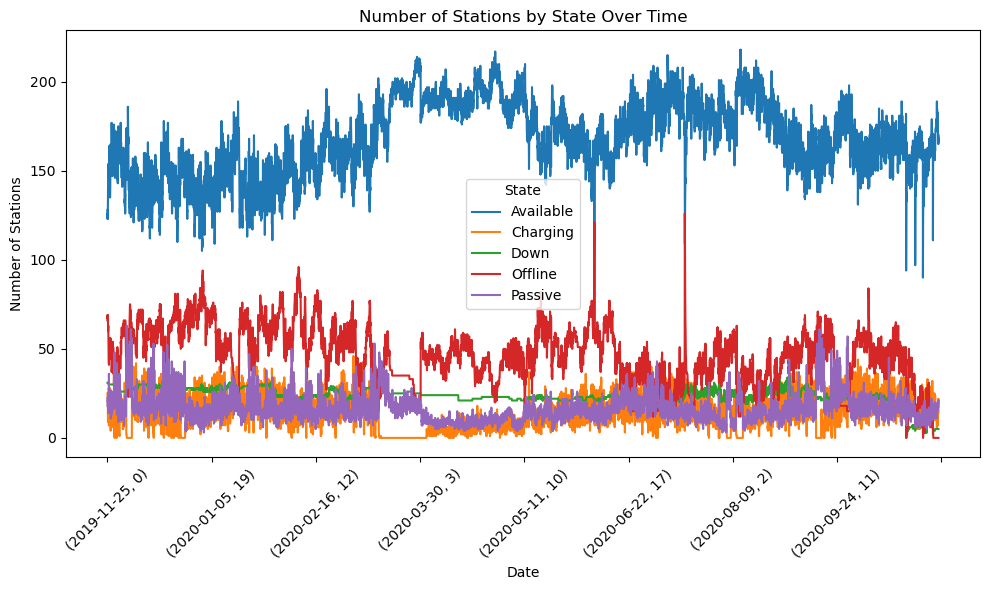

In [139]:
# Group by 'date' and 'state', count the stations
hourly_status = most_frequent_state.groupby(['date','hour', 'state']).size().unstack(fill_value=0)

# Plotting
hourly_status.plot(kind='line', figsize=(10, 6))

# Set labels and title
plt.title('Number of Stations by State Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.legend(title='State')

# Display the plot
plt.tight_layout()
plt.show()

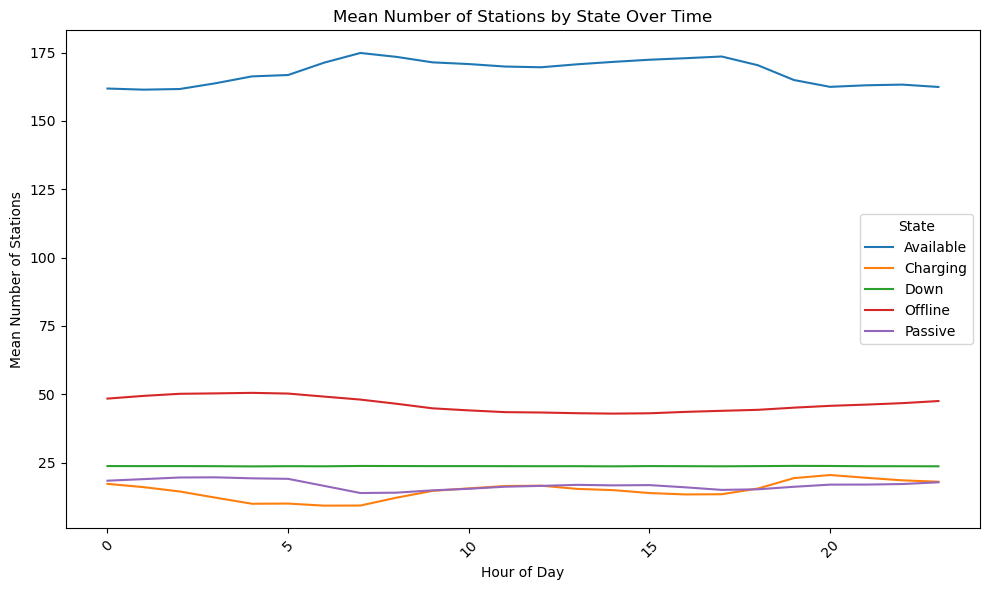

In [160]:

most_frequent_state['date'] = pd.to_datetime(most_frequent_state['date'])

most_frequent_state['month'] = most_frequent_state['date'].dt.month

# Group by 'month', 'hour', and 'state', and calculate the count of occurrences
hourly_mean_status = most_frequent_state.groupby(['month','date','hour', 'state']).size().unstack(fill_value=0)

# Now calculate the mean for each 'hour' across all dates
hourly_mean = hourly_mean_status.groupby(['hour']).mean()

# Plotting
hourly_mean.plot(kind='line', figsize=(10, 6))

# Set labels and title
plt.title('Mean Number of Stations by State Over Time')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Number of Stations')
plt.xticks(rotation=45)
plt.legend(title='State')

# Display the plot
plt.tight_layout()
plt.show()


In [167]:
hourly_mean

state,Available,Charging,Down,Offline,Passive
hour,,,,,
0,161.832836,17.229851,23.743284,48.417910,18.394030
1,161.422492,16.039514,23.723404,49.413374,18.966565
2,161.651515,14.442424,23.739394,50.175758,19.566667
3,163.779456,12.163142,23.694864,50.329305,19.619335
4,166.274096,9.957831,23.623494,50.521084,19.256024
5,166.776435,10.027190,23.697885,50.259819,19.069486
6,171.304217,9.268072,23.659639,49.150602,16.487952
7,174.839879,9.308157,23.779456,48.060423,13.882175
8,173.409639,12.180723,23.756024,46.530120,14.012048


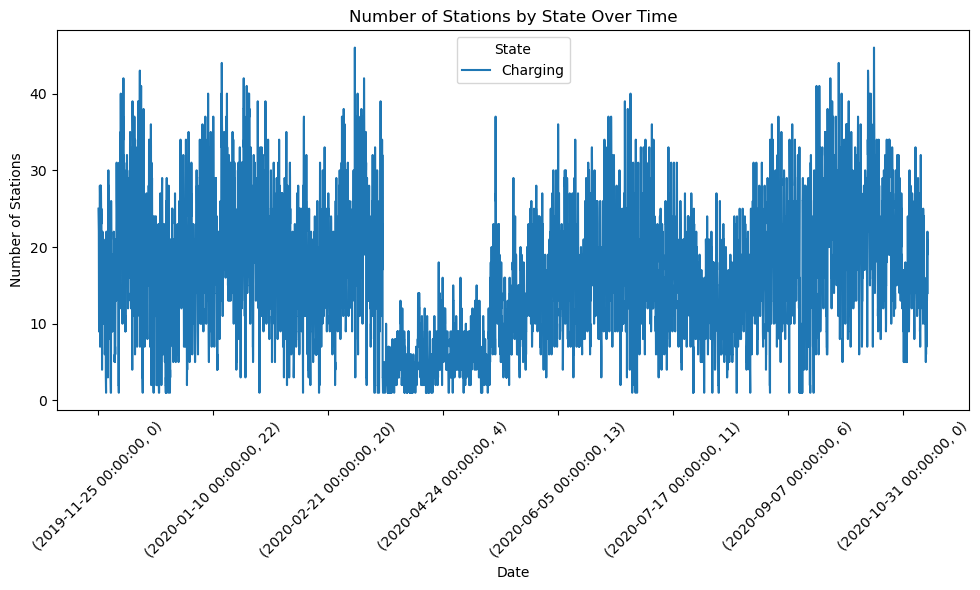

In [169]:
import pandas as pd

# Assuming you have a DataFrame 'most_frequent_state' with columns 'state' and 'hour'

# Filter for 'Charging' state
charging_data = most_frequent_state[most_frequent_state['state'] == 'Charging']

# Group by 'date', 'hour', and 'state', and calculate the mean number of stations
charging_data = charging_data.groupby(['date','hour','state']).size().unstack(fill_value=0)

# Plotting
charging_data.plot(kind='line', figsize=(10, 6))

# Set labels and title
plt.title('Number of Stations by State Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.legend(title='State')

# Display the plot
plt.tight_layout()
plt.show()


In [ ]:
hourly_status_charging .plot(kind='line', figsize=(10, 6))

# Set labels and title
plt.title('Mean Number of Stations by State Over Time')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Number of Stations')
plt.xticks(rotation=45)
plt.legend(title='State')

# Display the plot
plt.tight_layout()
plt.show()

In [81]:
charging_data

,station,date,hour,state
15,S1-T1,2019-11-25,15,Charging
44,S1-T1,2019-11-26,20,Charging
70,S1-T1,2019-11-27,22,Charging
108,S1-T1,2019-11-29,12,Charging
127,S1-T1,2019-11-30,7,Charging
...,...,...,...,...
2149997,S99-T3,2020-11-05,8,Charging
2149998,S99-T3,2020-11-05,9,Charging
2150002,S99-T3,2020-11-05,13,Charging
2150011,S99-T3,2020-11-05,22,Charging


In [51]:

# Filter the data for the specified date (2019-11-25)
hourly_status = most_frequent_state[most_frequent_state['date'] == '2019-11-25'] \
    .groupby(['date', 'hour', 'state']) \
    .size() \
    .unstack(fill_value=0)

# Plotting the data
hourly_status.plot(kind='line', figsize=(10, 6))

# Set labels and title
plt.title('Number of Stations by State Over Time (2019-11-25)')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Stations')
plt.xticks(rotation=45)
plt.legend(title='State')

# Display the plot
plt.tight_layout()
plt.show()

TypeError: no numeric data to plot

TypeError: no numeric data to plot

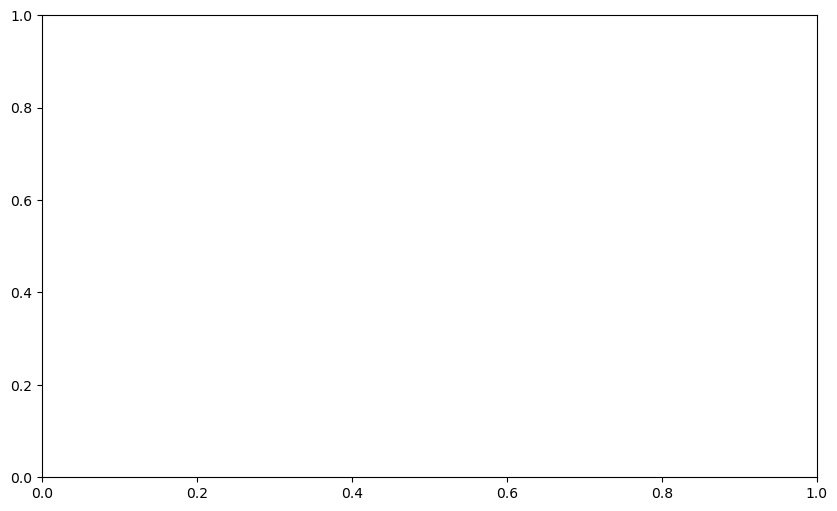

In [45]:
m

In [46]:
most_fr

hour
0     Available
1     Available
2     Available
3     Available
4     Available
5     Available
6     Available
7     Available
8     Available
9     Available
10    Available
11    Available
12    Available
13    Available
14    Available
15    Available
16    Available
17    Available
18    Available
19    Available
20    Available
21    Available
22    Available
23    Available
Name: state, dtype: object

In [31]:
station_count

,hour,state
0,0,Available
1,1,Available
2,2,Available
3,3,Available
4,4,Available
5,5,Available
6,6,Available
7,7,Available
8,8,Available
9,9,Available


EV charging State

/tmp/ipykernel_75830/3485234473.py:28: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


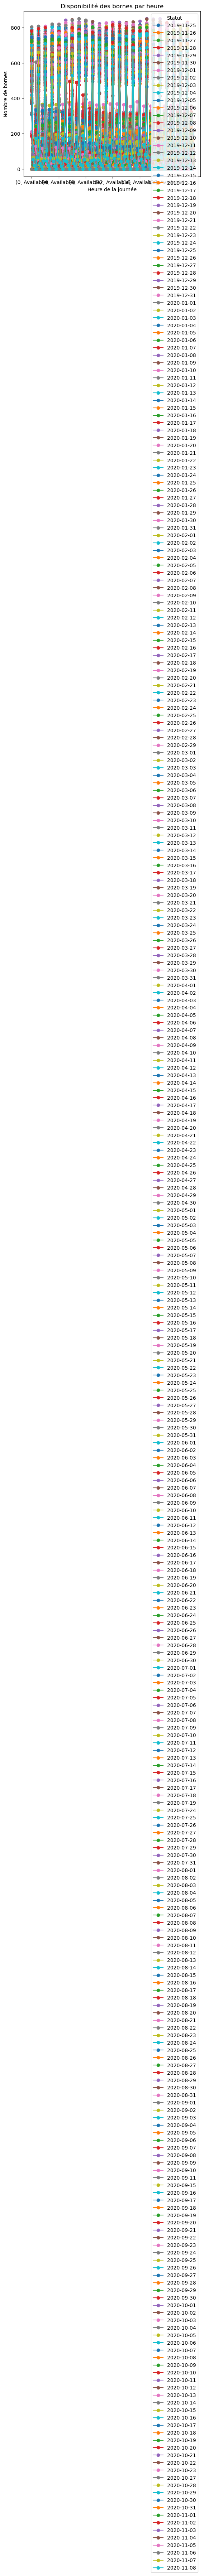

In [6]:
#Convertir last_updated en format datetime
real_time_data['timestamp'] = pd.to_datetime(real_time_data['timestamp'])

# Extraire les informations temporelles
real_time_data['hour'] = real_time_data['timestamp'].dt.hour
real_time_data['date'] = real_time_data['timestamp'].dt.date
real_time_data['weekday'] = real_time_data['timestamp'].dt.day_name()

# Average state per hour and week 
hourly_status = real_time_data.groupby(['hour','most_frequent_state',]).size().unstack(fill_value=0)
weekday_status = real_time_data.groupby(['weekday', 'state']).size().unstack(fill_value=0)

# Ordre des jours de la semaine
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_status = weekday_status.reindex(weekday_order)

# Graphiques de disponibilité moyenne
plt.figure(figsize=(14, 6))

# Graphique 1 : Tendances par heure
plt.subplot(1, 2, 1)
hourly_status.plot(kind='line', marker='o', ax=plt.gca())
plt.title("Disponibilité des bornes par heure")
plt.xlabel("Heure de la journée")
plt.ylabel("Nombre de bornes")
plt.legend(title="Statut")

plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert timestamp to datetime format
real_time_data['timestamp'] = pd.to_datetime(real_time_data['timestamp'])

# Extract hour and weekday from the timestamp
real_time_data['hour'] = real_time_data['timestamp'].dt.hour
real_time_data['weekday'] = real_time_data['timestamp'].dt.day_name()

# Create an hourly interval for grouping
real_time_data['hour_interval'] = real_time_data['timestamp'].dt.floor('H')

# Get the most frequent state per station per hour
most_frequent_state = (
    real_time_data.groupby(['hour_interval', 'station'])['state']
    .agg(lambda x: x.mode()[0])  # Get the most frequent state (mode) per station per hour
    .reset_index(name='dominant_state')
)

# Aggregate by hour and get the count of each state
hourly_dominant_state = most_frequent_state.groupby(['hour_interval', 'dominant_state']).size().unstack(fill_value=0)

# Plot hourly trends for the dominant state
plt.figure(figsize=(14, 6))
hourly_dominant_state.plot(kind='line', marker='o', ax=plt.gca())
plt.title("États dominants des stations par heure")
plt.xlabel("Heure de la journée")
plt.ylabel("Nombre de stations dans l'état dominant")
plt.legend(title="Statut")
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()



/tmp/ipykernel_75830/2049166857.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  real_time_data['hour_interval'] = real_time_data['timestamp'].dt.floor('H')


KeyError: 0

In [24]:
hourly_status

state,Available,Charging,Down,Offline,Passive
hour,,,,,
0,197278,23185,29884,63665,25232
1,194444,21025,29423,63291,25394
2,193200,19089,29238,63846,25837
3,194624,16378,29057,63995,25761
4,201247,14063,29514,65283,25856
5,209533,14542,30556,67157,26459
6,217871,14030,31047,67052,24353
7,222717,14485,31329,66393,21283
8,220708,18355,31388,64449,21710


In [ ]:
import pandas as pd

# Example DataFrames
# Dataset 1: Mapping of terminals to stations
terminals_df = pd.DataFrame({
    't_id': [1, 2, 3, 4],
    's_id': ['Station_A', 'Station_B', 'Station_C', 'Station_D']
})

# Dataset 2: Terminal statuses over time
status_df = pd.DataFrame({
    'timespam': ['2024-12-01 12:00', '2024-12-01 12:00', '2024-12-01 12:00', '2024-12-01 13:00'],
    't_id': [1, 2, 3, 4],
    'status': ['Available', 'Down', 'Charging', 'Passive']
})

# Merge the datasets on 't_id'
merged_df = pd.merge(status_df, terminals_df, on='t_id')

# Count the number of stations for each status at each timespan
status_counts = merged_df.groupby(['timespam', 'status']).size().reset_index(name='count')

# Pivot the data to get one row per timespan, and columns for each status
pivot_df = status_counts.pivot(index='timespam', columns='status', values='count').fillna(0).reset_index()

# Ensure the column names are clear
pivot_df.columns.name = None

print(pivot_df)


import pandas as pd

# Example DataFrames
# Dataset 1: Mapping of terminals to stations
terminals_df = pd.DataFrame({
    't_id': [1, 2, 3, 4],
    's_id': ['Station_A', 'Station_B', 'Station_C', 'Station_D']
})

# Dataset 2: Terminal statuses over time
status_df = pd.DataFrame({
    'timespam': ['2024-12-01 12:00', '2024-12-01 12:00', '2024-12-01 12:00', '2024-12-01 13:00'],
    't_id': [1, 2, 3, 4],
    'status': ['Available', 'Down', 'Charging', 'Passive']
})

# Merge the datasets on 't_id'
merged_df = pd.merge(status_df, terminals_df, on='t_id')

# Group by timespam, s_id, and status to count stations
status_counts = merged_df.groupby(['timestamp', 's_id', 'status']).size().reset_index(name='count')

# Pivot the data to have one row per station and timespam, with columns for each status
pivot_df = status_counts.pivot(index=['timestamp', 's_id'], columns='status', values='count').fillna(0).reset_index()

# Ensure the column names are clear
pivot_df.columns.name = None

print(pivot_df)

           timespam  Available  Charging  Down  Passive
0  2024-12-01 12:00        1.0       1.0   1.0      0.0
1  2024-12-01 13:00        0.0       0.0   0.0      1.0
